In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [2]:
test_data = pd.read_csv("../Data/custom/used data/test.csv")
test_data

,0,1,2
0,091/091_02.png,091_forg/091_forg_06.png,0
1,047/047_08.png,047_forg/047_forg_10.png,0
2,076/076_23.png,076/076_01.png,1
3,105/105_16.png,105_forg/105_forg_16.png,0
4,089/089_18.png,089/089_11.png,1
...,...,...,...
5962,074/074_09.png,074_forg/074_forg_06.png,0
5963,075/075_11.png,075/075_07.png,1
5964,099/099_22.png,099/099_12.png,1
5965,073/073_15.png,073_forg/073_forg_07.png,0


In [3]:
true_labels = np.array(test_data['2'])
true_labels.shape

(5967,)

In [4]:
pred_labels = np.load("../Data/custom/Performance/test_predictions.npy")

In [5]:
distances = np.load("../Data/custom/Performance/test_performance.npy")
distances.shape

(5967,)

In [9]:
accuracy_score(true_labels, pred_labels)

1.0

In [10]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2960
           1       1.00      1.00      1.00      3007

    accuracy                           1.00      5967
   macro avg       1.00      1.00      1.00      5967
weighted avg       1.00      1.00      1.00      5967



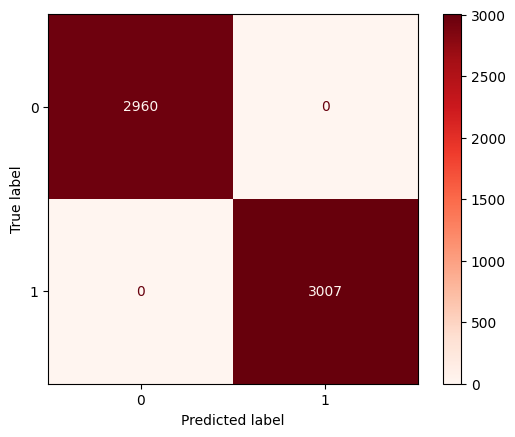

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cf = confusion_matrix(true_labels, pred_labels)
matrix_disp = ConfusionMatrixDisplay(cf)
matrix_disp.plot(cmap='Reds')
plt.show()

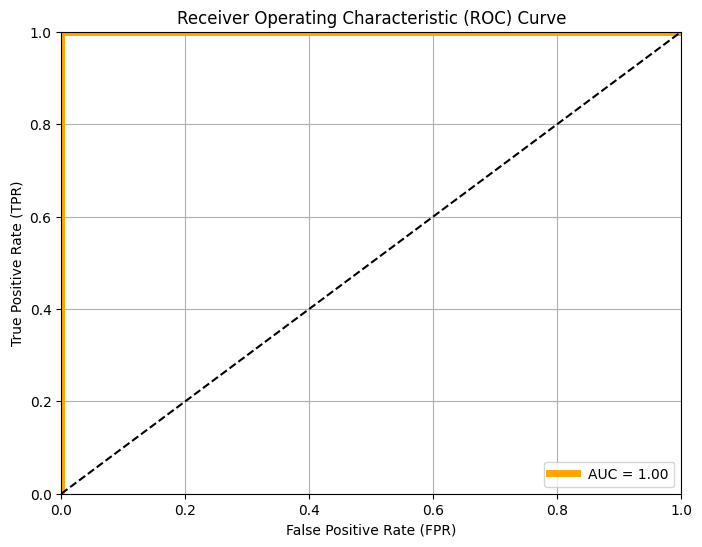

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
auc = roc_auc_score(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='orange', linewidth=5)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
